<a href="https://colab.research.google.com/github/deepanrajm/machine_learning/blob/master/Case_Studies/Face_Recognition/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition using LBPH**

![](https://drive.google.com/uc?export=view&id=11Y1L6VxaxAgwms5k0Iaw5NSyGq3nTQjj)

![](https://drive.google.com/uc?export=view&id=1axqiIBOiVbbuyCwTJ31xcxfCsWXvZoe-)

In [1]:
!git clone https://github.com/deepanrajm/machine_learning.git

Cloning into 'machine_learning'...
remote: Enumerating objects: 73082, done.
remote: Counting objects: 100% (3052/3052), done.
remote: Compressing objects: 100% (2855/2855), done.
remote: Total 73082 (delta 209), reused 3029 (delta 190), pack-reused 70030 (from 1)
Receiving objects: 100% (73082/73082), 126.34 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Updating files: 100% (5867/5867), done.


In [3]:
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imutils import paths
import cv2
import numpy as np
import pickle as cPickle
from google.colab.patches import cv2_imshow

In [4]:
def LBPH(image, eps=1e-7):

		lbp = feature.local_binary_pattern(image, numPoints,
			radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, numPoints + 3),
			range=(0, numPoints + 2))

		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		return hist

In [5]:
numPoints = 24
radius = 8
detector = cv2.CascadeClassifier("machine_learning/Case_Studies/Face_Recognition/haarcascade_frontalface_default.xml")

data = []
labels = []

In [6]:
for imagePath in paths.list_images("machine_learning/Case_Studies/Face_Recognition/data/Train"):
	image = cv2.imread(imagePath)
	print (imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	faceRects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
	if len(faceRects)>0:
		for (x, y, w, h) in faceRects:
			face_img = gray[y:y+h,x:x+w]
			hist = LBPH(face_img)
			labels.append(imagePath.split("/")[-2])
			data.append(hist)

machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/2.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/5.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/6.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/8.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/4.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/9.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/rdj/10.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/2.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/3.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/5.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/6.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/4.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/9.jpg
machine_learning/Case_Studies/Face_Recognition/data/Train/dhoni/10.jpg
machine_learning/Case_Studies/Fa

In [7]:
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(data, labels)
f = open("classifier.cPickle", "wb")
f.write(cPickle.dumps(model))
f.close()

In [8]:
loaded_model = cPickle.load(open("classifier.cPickle", 'rb'))

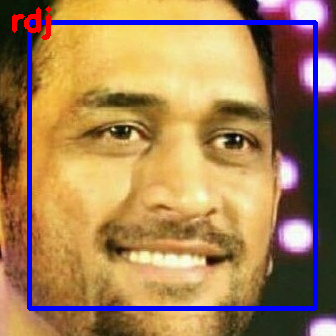

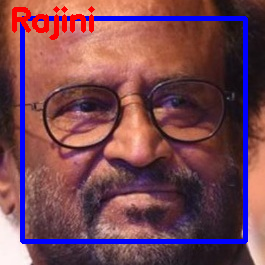

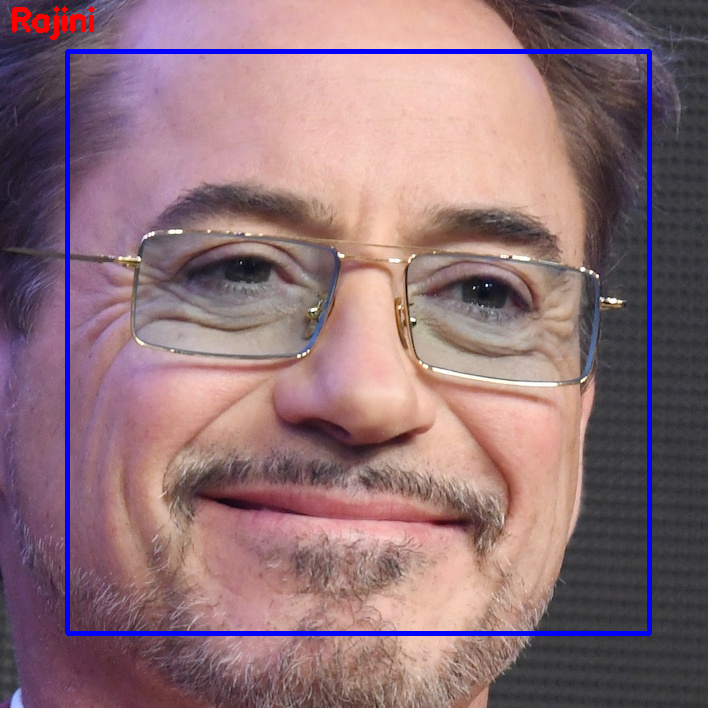

In [9]:
for imagePath in paths.list_images("machine_learning/Case_Studies/Face_Recognition/data/val"):
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	faceRects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
	if len(faceRects)>0:
		for (x, y, w, h) in faceRects:
			face_img = gray[y:y+h,x:x+w]
			cv2.rectangle(image, (x, y), (x + w, y + h), (255,0, 0), 3)
			hist = LBPH(face_img)
			prediction = loaded_model.predict(hist.reshape(1, -1))[0]
			cv2.putText(image, prediction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
			cv2_imshow(image)